In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_breast_cancer



In [2]:
# Load dataset (example using sklearn's built-in dataset)
data = load_breast_cancer()
df = pd.DataFrame(data.data, columns=data.feature_names)
df['target'] = data.target



In [3]:
# Basic exploration
print(df.head())
print("\nDataset shape:", df.shape)
print("\nData types:\n", df.dtypes)
print("\nMissing values:\n", df.isnull().sum())
print("\nClass distribution:\n", df['target'].value_counts())

   mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0        17.99         10.38          122.80     1001.0          0.11840   
1        20.57         17.77          132.90     1326.0          0.08474   
2        19.69         21.25          130.00     1203.0          0.10960   
3        11.42         20.38           77.58      386.1          0.14250   
4        20.29         14.34          135.10     1297.0          0.10030   

   mean compactness  mean concavity  mean concave points  mean symmetry  \
0           0.27760          0.3001              0.14710         0.2419   
1           0.07864          0.0869              0.07017         0.1812   
2           0.15990          0.1974              0.12790         0.2069   
3           0.28390          0.2414              0.10520         0.2597   
4           0.13280          0.1980              0.10430         0.1809   

   mean fractal dimension  ...  worst texture  worst perimeter  worst area  \
0             

In [4]:
# Descriptive statistics
print("\nDescriptive stats:\n", df.describe())



Descriptive stats:
        mean radius  mean texture  mean perimeter    mean area  \
count   569.000000    569.000000      569.000000   569.000000   
mean     14.127292     19.289649       91.969033   654.889104   
std       3.524049      4.301036       24.298981   351.914129   
min       6.981000      9.710000       43.790000   143.500000   
25%      11.700000     16.170000       75.170000   420.300000   
50%      13.370000     18.840000       86.240000   551.100000   
75%      15.780000     21.800000      104.100000   782.700000   
max      28.110000     39.280000      188.500000  2501.000000   

       mean smoothness  mean compactness  mean concavity  mean concave points  \
count       569.000000        569.000000      569.000000           569.000000   
mean          0.096360          0.104341        0.088799             0.048919   
std           0.014064          0.052813        0.079720             0.038803   
min           0.052630          0.019380        0.000000             

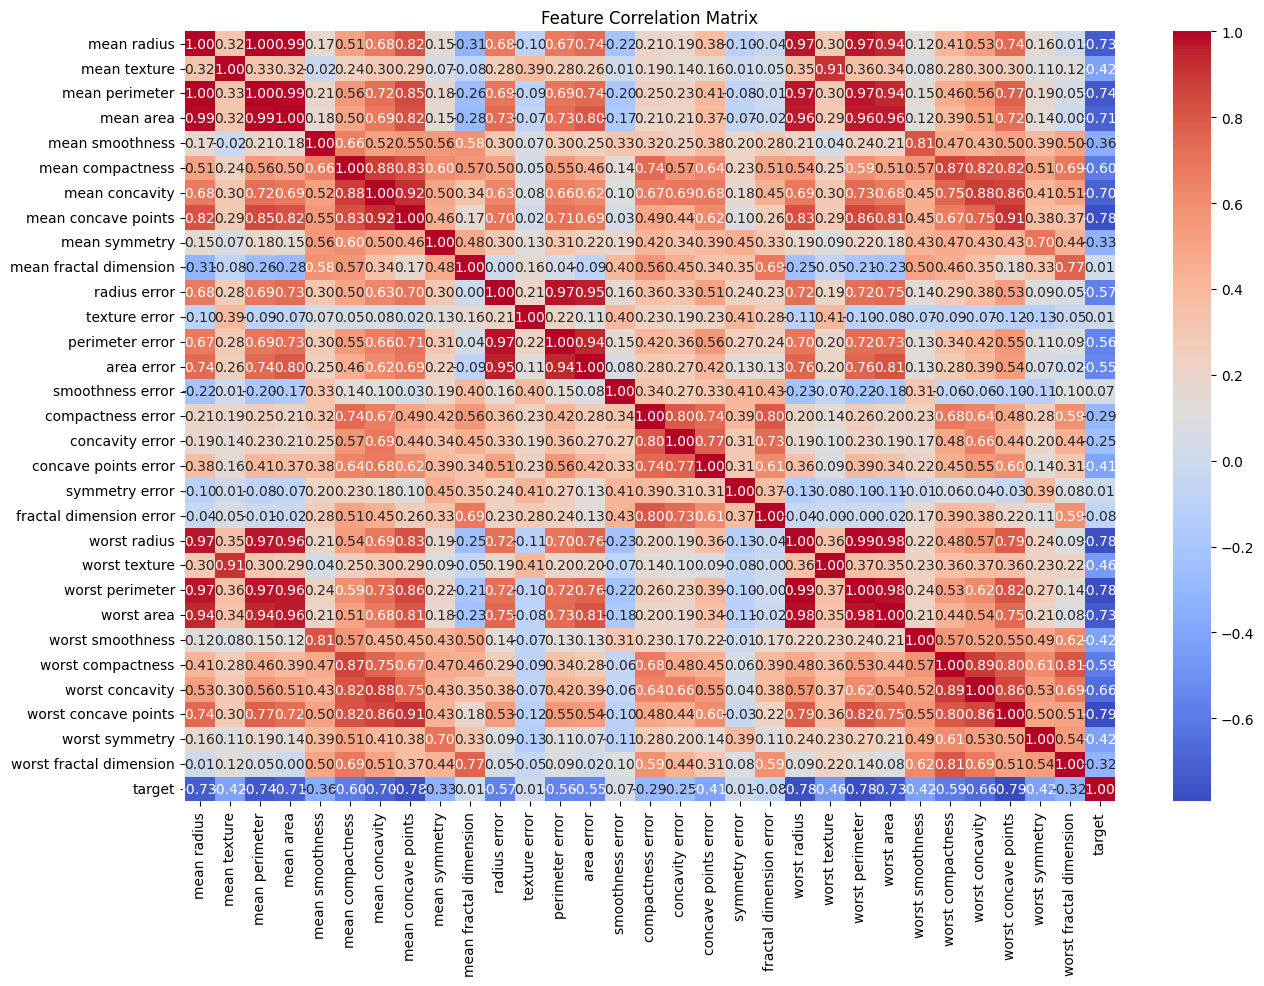

In [5]:
# Correlation analysis
corr_matrix = df.corr()
plt.figure(figsize=(15, 10))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.title("Feature Correlation Matrix")
plt.show()

In [6]:
# Target correlation
target_corr = corr_matrix['target'].sort_values(ascending=False)
print("\nTarget correlation:\n", target_corr)


Target correlation:
 target                     1.000000
smoothness error           0.067016
mean fractal dimension     0.012838
texture error              0.008303
symmetry error             0.006522
fractal dimension error   -0.077972
concavity error           -0.253730
compactness error         -0.292999
worst fractal dimension   -0.323872
mean symmetry             -0.330499
mean smoothness           -0.358560
concave points error      -0.408042
mean texture              -0.415185
worst symmetry            -0.416294
worst smoothness          -0.421465
worst texture             -0.456903
area error                -0.548236
perimeter error           -0.556141
radius error              -0.567134
worst compactness         -0.590998
mean compactness          -0.596534
worst concavity           -0.659610
mean concavity            -0.696360
mean area                 -0.708984
mean radius               -0.730029
worst area                -0.733825
mean perimeter            -0.742636
worst 

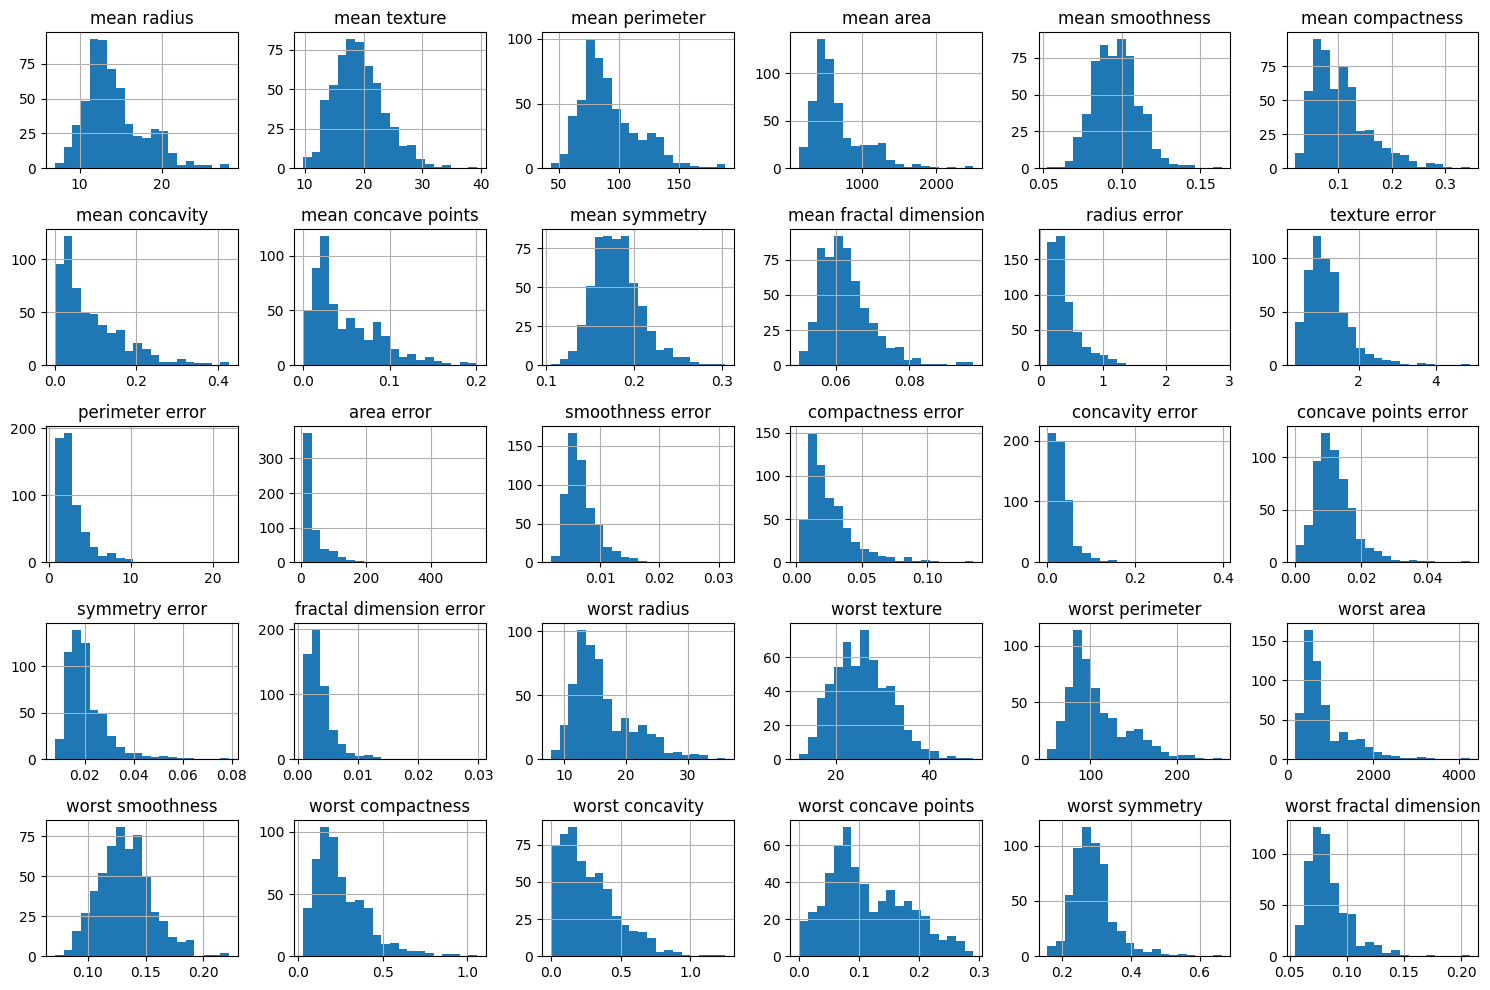

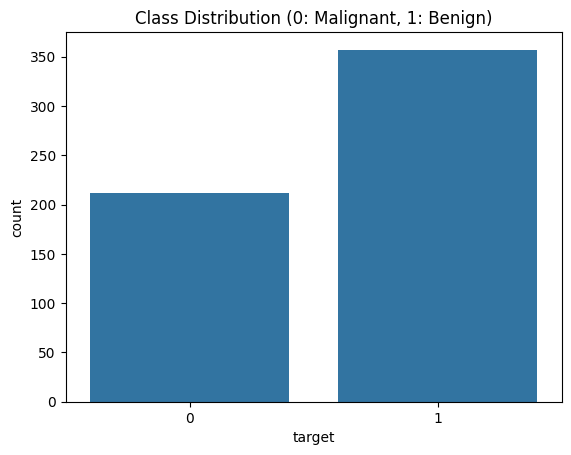

In [7]:
# Distribution of numerical features
num_cols = df.select_dtypes(include=['float64']).columns
df[num_cols].hist(bins=20, figsize=(15, 10), layout=(5, 6))
plt.tight_layout()
plt.show()

# Target distribution
sns.countplot(x='target', data=df)
plt.title("Class Distribution (0: Malignant, 1: Benign)")
plt.show()

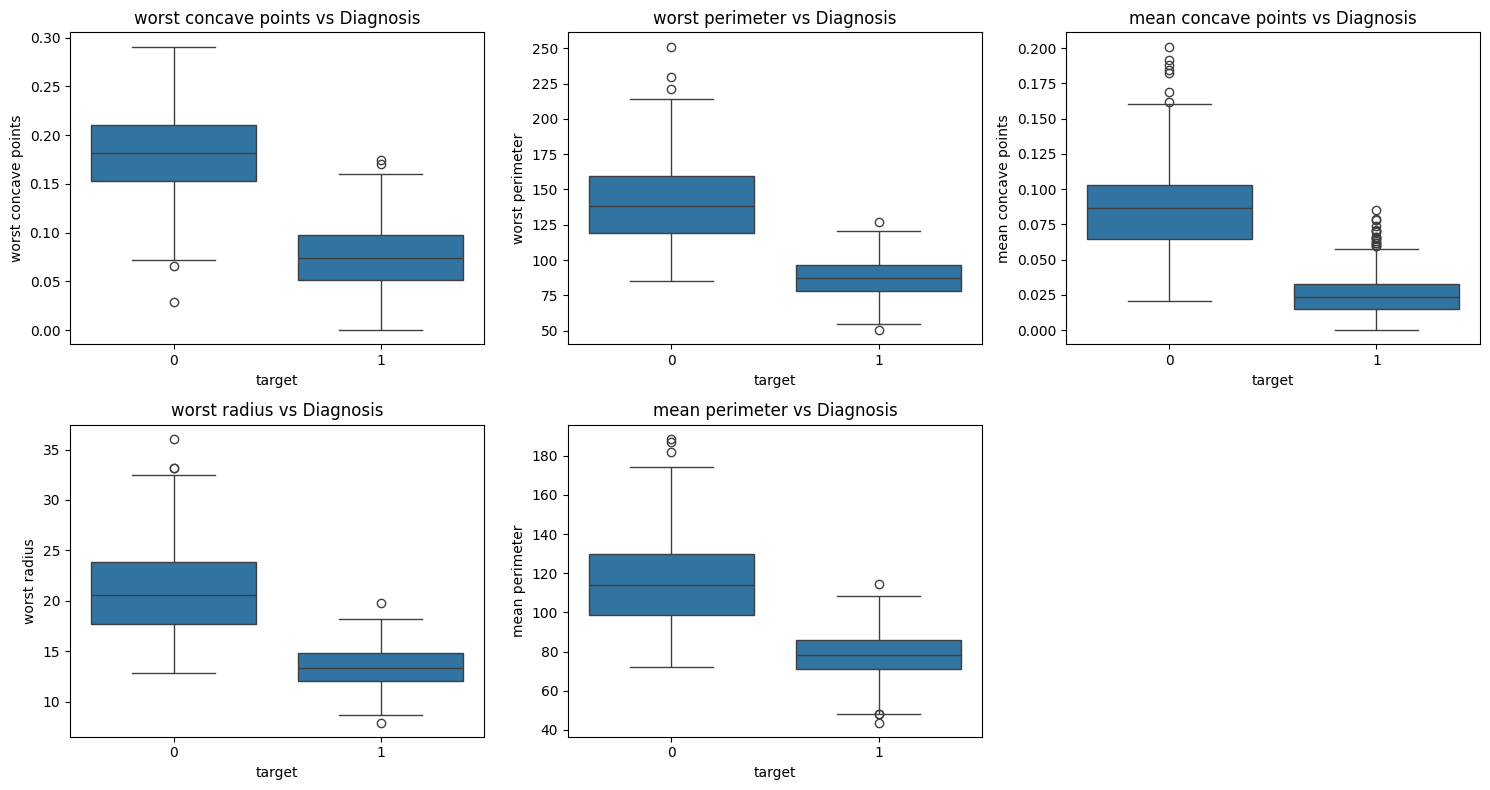

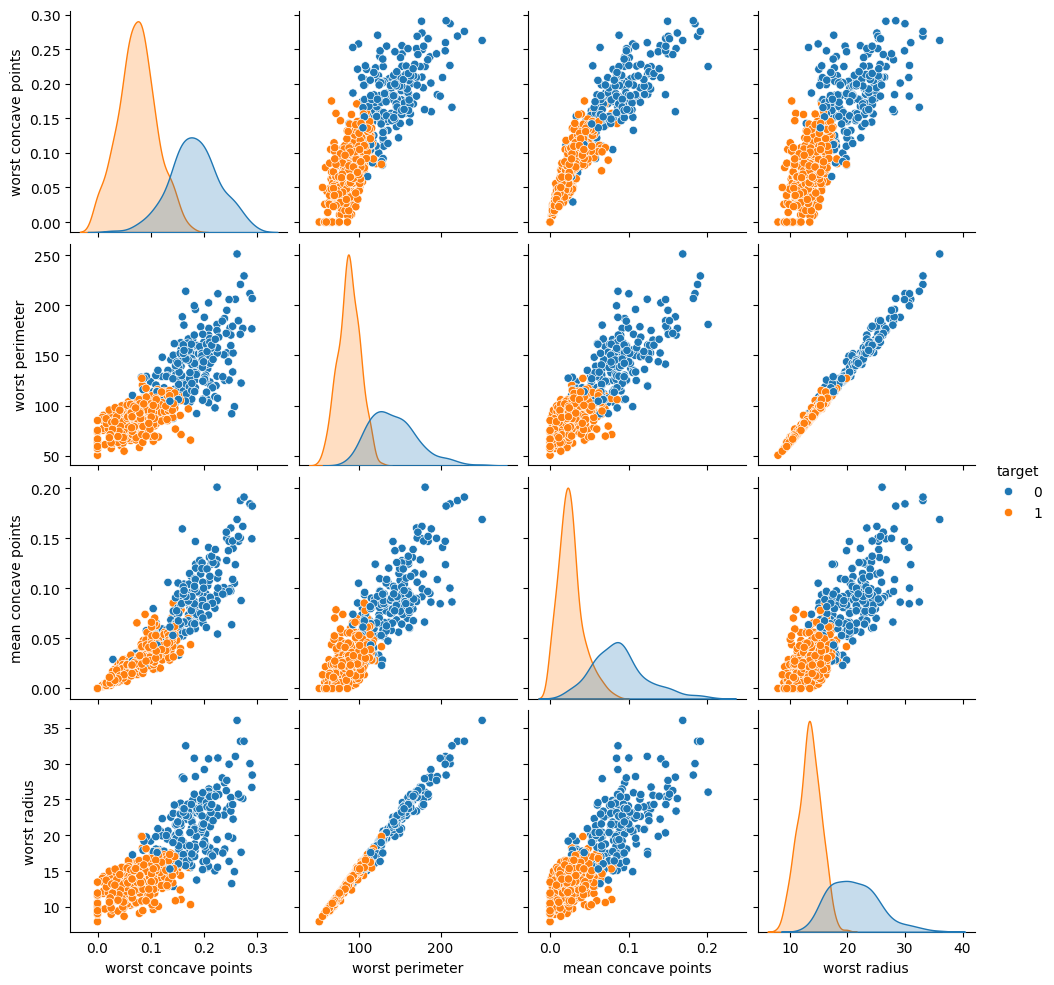

In [8]:
# Boxplots of top features vs target
top_features = target_corr.abs().sort_values(ascending=False).index[1:6]

plt.figure(figsize=(15, 8))
for i, feature in enumerate(top_features, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(x='target', y=feature, data=df)
    plt.title(f"{feature} vs Diagnosis")
plt.tight_layout()
plt.show()

# Pairplot of top correlated features
sns.pairplot(df[list(top_features[:4]) + ['target']], hue='target', diag_kind='kde')
plt.show()

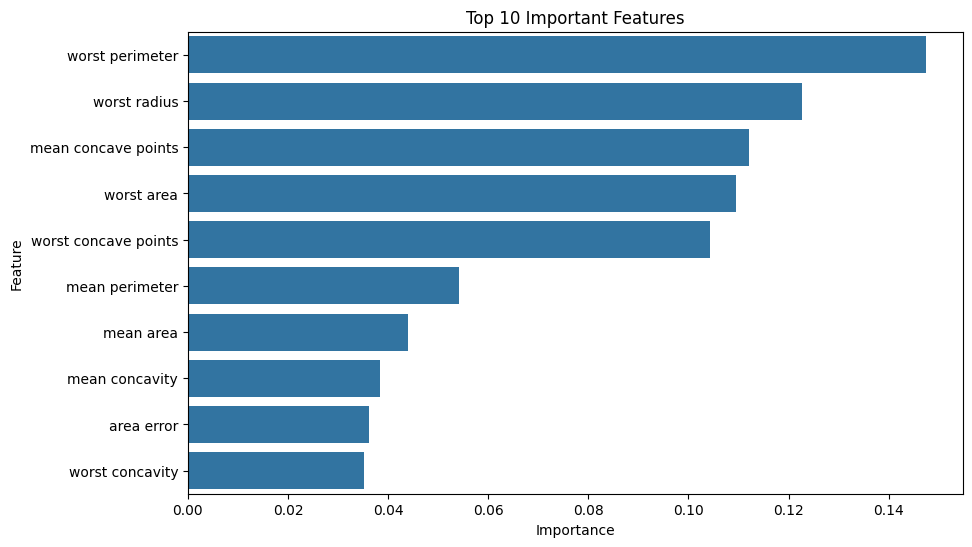

In [9]:
# Feature importance (using random forest for quick assessment)
from sklearn.ensemble import RandomForestClassifier

X = df.drop('target', axis=1)
y = df['target']

model = RandomForestClassifier()
model.fit(X, y)

importance = pd.DataFrame({
    'Feature': X.columns,
    'Importance': model.feature_importances_
}).sort_values('Importance', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=importance.head(10))
plt.title("Top 10 Important Features")
plt.show()


Number of outliers: 74

Outlier rows:
     mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0         17.99         10.38          122.80     1001.0           0.1184   
3         11.42         20.38           77.58      386.1           0.1425   
9         12.46         24.04           83.97      475.9           0.1186   
12        19.17         24.80          132.40     1123.0           0.0974   
14        13.73         22.61           93.60      578.3           0.1131   

    mean compactness  mean concavity  mean concave points  mean symmetry  \
0             0.2776          0.3001              0.14710         0.2419   
3             0.2839          0.2414              0.10520         0.2597   
9             0.2396          0.2273              0.08543         0.2030   
12            0.2458          0.2065              0.11180         0.2397   
14            0.2293          0.2128              0.08025         0.2069   

    mean fractal dimension  ...  worst t

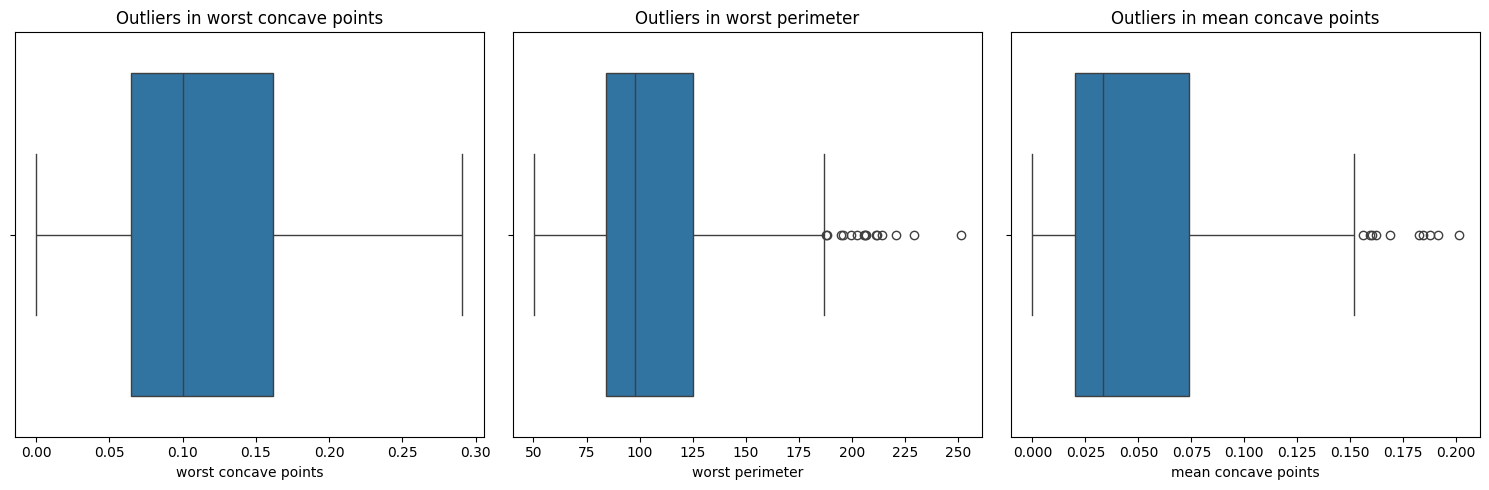

In [10]:
# Z-score method for outlier detection
from scipy import stats
import numpy as np

z_scores = stats.zscore(df[num_cols])
abs_z_scores = np.abs(z_scores)
outliers = (abs_z_scores > 3).any(axis=1)

print(f"\nNumber of outliers: {outliers.sum()}")
print("\nOutlier rows:\n", df[outliers].head())

# Visualize outliers for top features
plt.figure(figsize=(15, 5))
for i, feature in enumerate(top_features[:3], 1):
    plt.subplot(1, 3, i)
    sns.boxplot(x=df[feature])
    plt.title(f"Outliers in {feature}")
plt.tight_layout()
plt.show()

In [11]:
# Check for multicollinearity
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif_data = pd.DataFrame()
vif_data["Feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(len(X.columns))]

print("\nVIF scores:\n", vif_data.sort_values('VIF', ascending=False))

# Check for data leakage
# (Ensure no features directly contain diagnostic information)


VIF scores:
                     Feature           VIF
0               mean radius  63306.172036
2            mean perimeter  58123.586079
20             worst radius   9674.742602
22          worst perimeter   4487.781270
3                 mean area   1287.262339
23               worst area   1138.759252
9    mean fractal dimension    629.679874
29  worst fractal dimension    423.396723
4           mean smoothness    393.398166
24         worst smoothness    375.597155
21            worst texture    343.004387
1              mean texture    251.047108
10             radius error    236.665738
28           worst symmetry    218.919805
12          perimeter error    211.396334
5          mean compactness    200.980354
8             mean symmetry    184.426558
6            mean concavity    157.855046
7       mean concave points    154.241268
27     worst concave points    148.673180
25        worst compactness    132.884276
26          worst concavity     86.310362
13               are

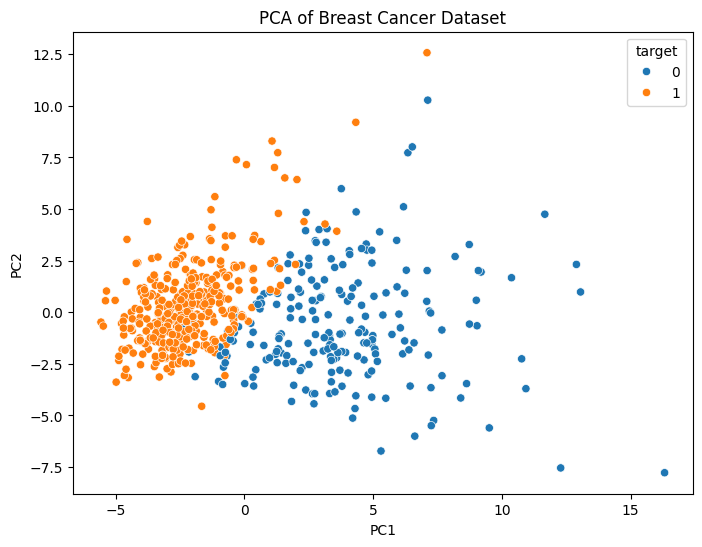


Explained variance ratio: [0.44272026 0.18971182]


In [12]:
# PCA for dimensionality reduction visualization
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

pca = PCA(n_components=2)
principal_components = pca.fit_transform(X_scaled)

pca_df = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'])
pca_df['target'] = y

plt.figure(figsize=(8, 6))
sns.scatterplot(x='PC1', y='PC2', hue='target', data=pca_df)
plt.title("PCA of Breast Cancer Dataset")
plt.show()

print("\nExplained variance ratio:", pca.explained_variance_ratio_)